In [1]:
import numpy as np
import numpy.random as rnd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from ipywidgets import widgets, interact, interactive, fixed, interact_manual

from IPython.display import display, clear_output
import string
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
alphabet = list(string.ascii_uppercase)
max_categories = len(alphabet)
categories = ['A']
probabilities = [1.]
dist_type = 'Uniform'

In [3]:
categories_slider = widgets.IntSlider(min=1, max=max_categories, description='Categories')
categories_slider.layout.width = 'auto'

distribution_slider = widgets.IntSlider(min=1, max=100, description='Less - More')
distribution_slider.layout.width = 'auto'

distribution_toggle = widgets.ToggleButtons(
    options=['Uniform', 'Normal', 'Skewed'],
    description='Distribution:',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
)

In [4]:
def plot_dist(x_axis, y_axis):
    plt.clf()
    plt.ylabel('%')
    plt.xlabel('Category')
    plt.ylim((0,100.))
    sns.barplot(x=x_axis, y=y_axis, palette='pastel')
    plt.show()

In [5]:
def calcProbabilities(cats):
    result = []
    
    if(len(cats)<=1):
        result.append(1.)
    else:

        if(dist_type == 'Uniform'):
            result.extend(np.repeat(1./len(cats), len(cats)).tolist())
        elif(dist_type == 'Normal'):
            # FIXME: Better algorithm
            result.append(0.5)
            result.extend(np.repeat(0.5/(len(cats)-1), len(cats)-1).tolist())
        elif(dist_type == 'Skewed'):
            # FIXME: Better algorithm
            result.append(0.5)
            result.extend(np.repeat(0.5/(len(cats)-1), len(cats)-1).tolist())

    return result

In [6]:
def update(toggle, d_slider, c_slider):
    global categories
    global probabilities
    global dist_type
    
    dist_type = toggle
    categories = alphabet[0:categories_slider.value]
    probabilities = calcProbabilities(categories)
    
    plot_dist(pd.Series(categories), pd.Series(probabilities)*100)


In [7]:
interact(update, toggle=distribution_toggle, d_slider=distribution_slider, c_slider=categories_slider)

interactive(children=(ToggleButtons(description=u'Distribution:', options=('Uniform', 'Normal', 'Skewed'), val…

<function __main__.update>

In [8]:
sliders = []

uniform_button = widgets.Button(description='Uniform')
normal_button = widgets.Button(description='Normal')
draw_button = widgets.Button(description='Draw', icon='fa-bar-chart', button_style='success')

for i in range(0, categories_slider.value):
    sliders.append(widgets.IntSlider(min=0, max=100, description=categories[i], orientation='vertical'))
    
slider_box = widgets.HBox(sliders)
dist_box = widgets.HBox([uniform_button, normal_button])
box = widgets.VBox([dist_box,slider_box, draw_button])
box.layout.align_items='center'

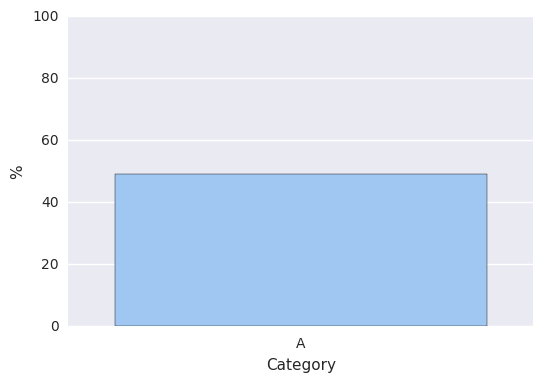

In [10]:
display(box)
plot_dist(pd.Series([str(slider.description) for slider in sliders]), pd.Series([slider.value for slider in sliders]))